In [1]:
from PIL import Image, ImageFont, ImageDraw  #Python Imaging Library
import glob, os

ModuleNotFoundError: No module named 'PIL'

In [12]:
def add_watermark_to_image(image, watermark):
    rgba_image = image.convert('RGBA')
    rgba_watermark = watermark.convert('RGBA')
    image_x, image_y = rgba_image.size  
    watermark_x, watermark_y = rgba_watermark.size
    # 縮放圖片
    scale = 2
    watermark_scale = max(image_x / (scale * watermark_x), image_y / (scale * watermark_y))
    new_size = (int(watermark_x * watermark_scale), int(watermark_y * watermark_scale))
    rgba_watermark = rgba_watermark.resize(new_size, resample=Image.ANTIALIAS)  #ANTIALIAS:反鋸齒
    # 透明度
    rgba_watermark_mask = rgba_watermark.convert("L").point(lambda x: min(x, 180))
    rgba_watermark.putalpha(rgba_watermark_mask)

    watermark_x, watermark_y = rgba_watermark.size
    # 水印位置
    #rgba_image.paste(rgba_watermark, (image_x - watermark_x, image_y - watermark_y), rgba_watermark_mask) #右下角
    #rgba_image.paste(rgba_watermark, (image_x - watermark_x, 0), rgba_watermark_mask)  #右上角 
    rgba_image.paste(rgba_watermark, (image_x - watermark_x, 0), rgba_watermark_mask)
    return rgba_image

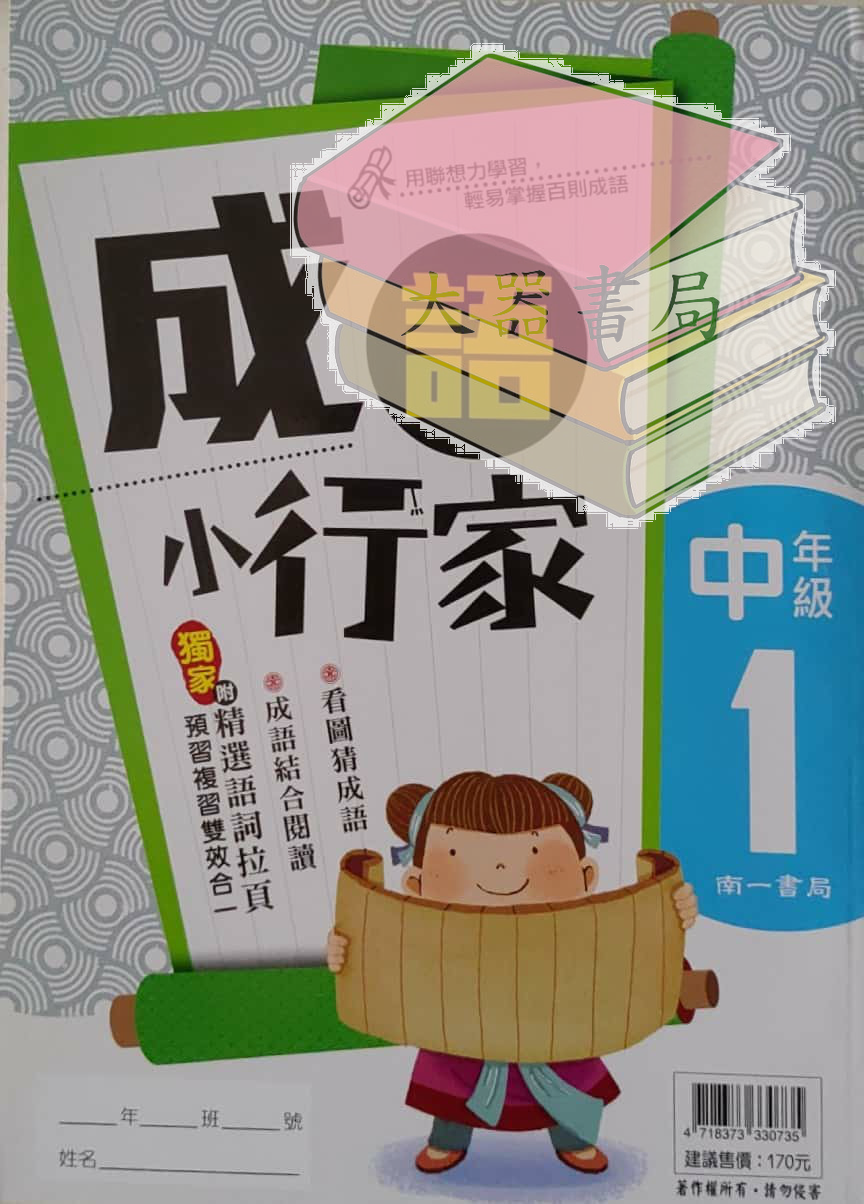

In [30]:
watermark=Image.open('大器書局.png')
image=Image.open('C:/Users/USER/Desktop/精誠書局/(南一國小)成語小行家_中1.jpg')
im_watermark=add_watermark_to_image(image, watermark)
im_watermark

In [3]:
def change_alpha_from_image(image):
    rgba_image=image.convert('RGBA')
    proportion=10  #要讓透明度的比例
    size_x,size_y=rgba_image.size()
    pixels=[]
    for 
    for x in size_x:
        for y in size_y:
            rgba_image.getpixel(x,y)[:4]
            
            
        
        
     
    #image_x, image_y = rgba_image.size  

In [4]:
#im_before = Image.open("ina.png")  #.PNG格式的图片才支持透明度设置哦，儲存為 PNG 格式， JPG 格式貌似是不支援透明背景的。
#im_before.show()
#im_watermark = Image.open('okitaalter.jpg')
#im_after = add_watermark_to_image(im_before, im_watermark)
#im_after.show()

In [3]:
im_book= Image.open('C:/Users/USER/Desktop/精誠書局/(南一國小)成語小行家_中1.jpg')
im_book_watermark=Image.open('C:/Users/USER/Desktop/書局.png')
#add_watermark_to_image(im_book,im_book_watermark)

In [25]:
#圖片去背
def removing_backgrounds(image):
    rgba_image = image.convert('RGBA')
    #print(rgba_image.getpixel((0,0)))
    rgba_image_pixels=[]
    for pixels in rgba_image.getdata():  #返回PIL庫的內部類型，RGB:[,,]...，type:'ImagingCore'
        if pixels[:3]==rgba_image.getpixel((0,0))[:3]:  #[255,255,255]，因為它是微灰的
            rgba_image_pixels.append((255,255,255,0))  #tuple
        else:
            rgba_image_pixels.append(pixels)
    rgba_image.putdata(rgba_image_pixels)
    rgba_image.resize(rgba_image.size,resample=Image.ANTIALIAS)
    rgba_image.save('book.png')
    #print(rgba_image.getpixel((0,0)))
    return rgba_image

In [18]:
im_test1 = Image.open('C:/Users/USER/Desktop/書本1.jpg')
print(im_test1.getpixel((0,0)))

(245, 245, 245)


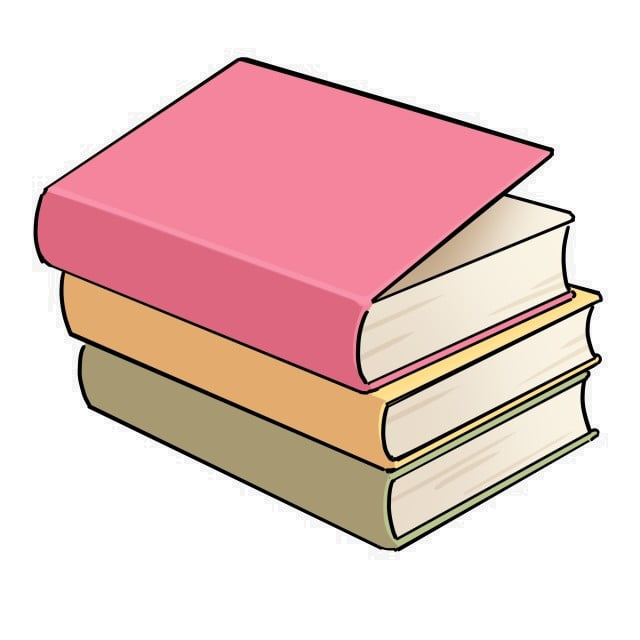

In [26]:
im_after=removing_backgrounds(im_test1)
im_after

In [28]:
im_after.size()

#print(rgba_image.getpixel((0,0)))

TypeError: 'tuple' object is not callable